Plotando S(T)

/tmp/ipykernel_23905/1755745953.py:6: RuntimeWarning: overflow encountered in cosh
  Z = 1 + np.exp(8 * J / (K * T)) + 2 * np.cosh(2 * h / (K * T))
/tmp/ipykernel_23905/1755745953.py:8: RuntimeWarning: overflow encountered in sinh
  numerator = 8 * J * np.exp(8 * J / (K * T)) + 4 * h * np.sinh(2 * h / (K * T))
/tmp/ipykernel_23905/1755745953.py:10: RuntimeWarning: invalid value encountered in divide
  term2 = numerator / denominator


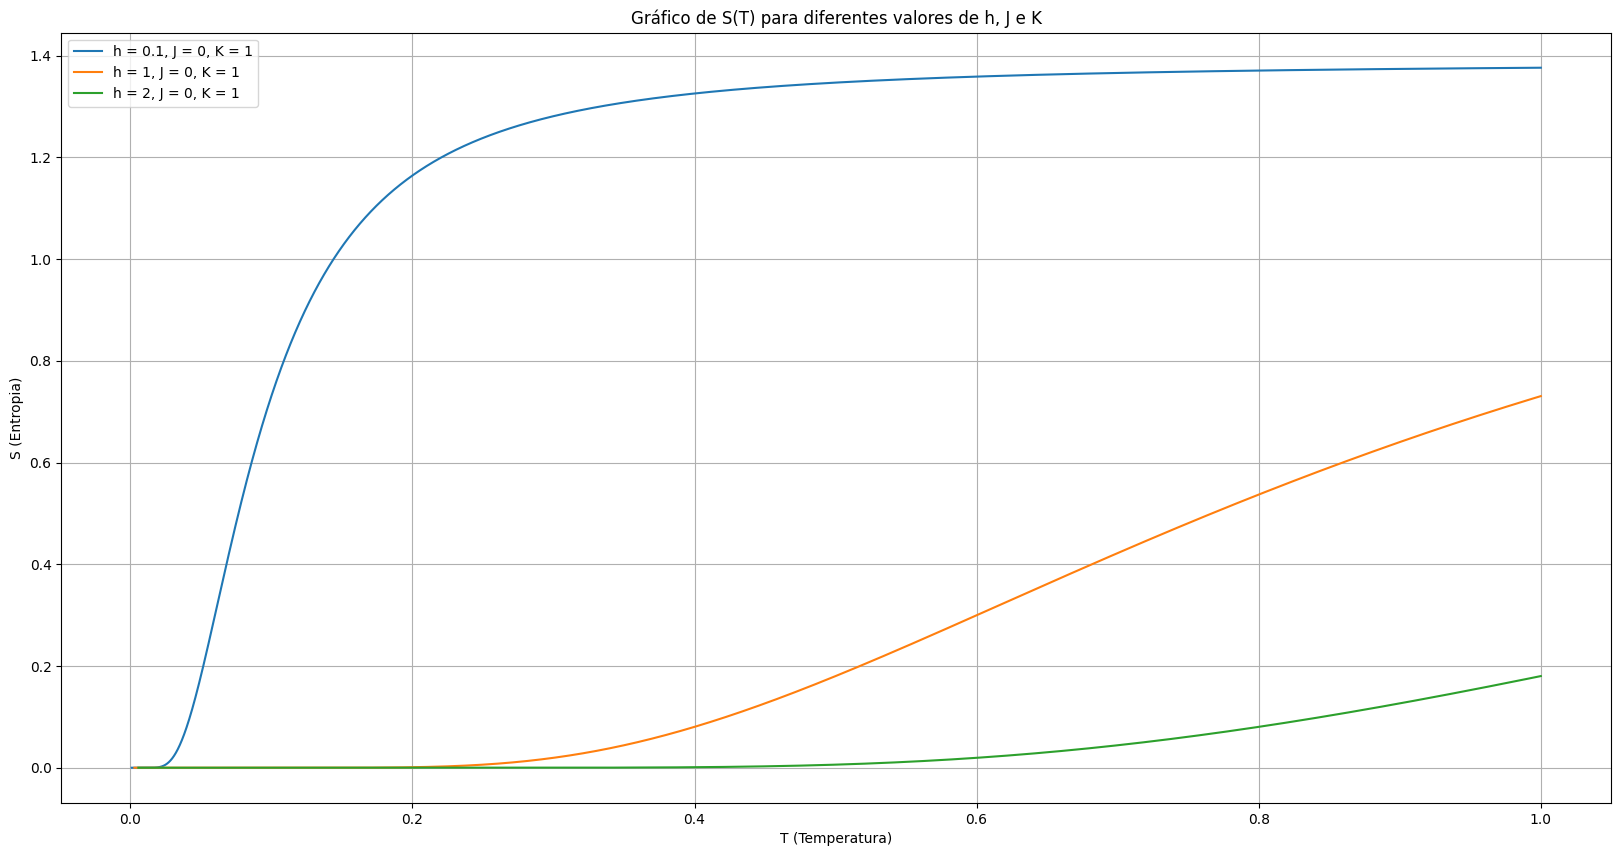

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função S(T)
def S(T, J, K, h):
    Z = 1 + np.exp(8 * J / (K * T)) + 2 * np.cosh(2 * h / (K * T))
    term1 = K * np.log(Z)
    numerator = 8 * J * np.exp(8 * J / (K * T)) + 4 * h * np.sinh(2 * h / (K * T))
    denominator = T * Z
    term2 = numerator / denominator
    return term1 - term2

# Definir os intervalos de T
T_values = np.linspace(0.001, 1, 10000)

# Definir os valores para h, K e J que serão usados nas plotagens
h_values = [0.1, 1, 2]
K_values = [1]
J_values = [0]

# Criar o gráfico
plt.figure(figsize=(20, 10))

# Loop para calcular S(T) para cada combinação de h, K e J e plotar os resultados
for h in h_values:
    for K in K_values:
        for J in J_values:
            S_values = S(T_values, J, K, h)
            plt.plot(T_values, S_values, label=f'h = {h}, J = {J}, K = {K}')

# Adicionar título e rótulos
plt.title('Gráfico de S(T) para diferentes valores de h, J e K')
plt.xlabel('T (Temperatura)')
plt.ylabel('S (Entropia)')

# Incluir a equação no gráfico (opcional)
equation_text = r'$S(T) = K \log\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right) - \frac{8J e^{\frac{8J}{KT}} + 4h \sinh\left(\frac{2h}{KT}\right)}{T\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right)}$'
#plt.text(6, 0.5, equation_text, fontsize=15, bbox=dict(facecolor='white', alpha=1))

# Exibir a grade, a legenda e o gráfico
plt.grid(True)
plt.legend()
plt.show()

Plotando T(h, J, S). com S contanste, pois queremos o processo adiabático


In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import os


#Definindo constantes
#BOLTZMANN = 1 # boltzmann constant -> Kb
ANTIFERROMAGNETIC_EXCHANGE_COUPLING = 0.5 #J>=0
ENTROPY = 0 #S tem que ser constante pq o processo é adibático
TEMPERATURE_INITIAL_GUESS = 1 # melhorando o chute inicial para um valor maior
MAGNETIC_FIELD_INITIAL = 2 # O valor inicial do campo magnético
MAGNETIC_FIELD_FINAL = 1 #O valor final do campo magnético

def log_detailed_calculation(magnetic_field):
    return (magnetic_field > 1 and magnetic_field < 1.0001)


#definindo a função T(h), o único parâmetro é h pois é a única coisa que vai mudar de h_i até h_f
def Temp(ANTIFERROMAGNETIC_EXCHANGE_COUPLING, temperature, magnetic_field, ENTROPY):
    
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}]")
    Z = (                                                          
        1 + 
        np.exp((8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING) / (temperature)) + 
        (
            2 * 
            np.cosh((2 * magnetic_field) / (temperature))
        )
    )
    term1 = (ENTROPY * (-1)) + (np.log(Z))
    numerator = (                
            (
                8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING * 
                np.exp((8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING) / (temperature))
            ) + 
            (
                4 * magnetic_field * 
                np.sinh((2 * magnetic_field) / (temperature))
            )
        )
    denominator = temperature * Z
    term2 =  numerator / denominator
    calculated_temperature = term1 - term2
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}] result[{calculated_temperature}]")
    return calculated_temperature


def calc_BTandBS(J, MAGNETIC_FIELD_INITIAL, MAGNETIC_FIELD_FINAL, TEMPERATURE_INITIAL_GUESS, ENTROPY, INTERVAL, initialOrFinal):

    #definindo os intervalos de h
    magnetic_fields = np.linspace(MAGNETIC_FIELD_INITIAL, MAGNETIC_FIELD_FINAL, INTERVAL)
    B = magnetic_fields
    temperatures = []
    temperature_guess = TEMPERATURE_INITIAL_GUESS
    
    S_values = np.zeros_like(B)
    T_values = np.zeros_like(B)
    B_values = np.zeros_like(B)
    temperatures = []


    for i, magnetic_field in enumerate(magnetic_fields):
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
        try:
            calculated_temperature = fsolve(lambda temperature: Temp(J, temperature, magnetic_field, ENTROPY), temperature_guess)
            temperature_guess = calculated_temperature[0]
            T_val = calculated_temperature[0]
            print(f"B: {magnetic_field}")
            if (log_detailed_calculation(magnetic_field)):
                print(f"Final Result={calculated_temperature}")
            
            T_values[i] = T_val
            B_values[i] = magnetic_field
            S_values[i] = round(Temp(J, T_values[i], B_values[i], ENTROPY), 5)
            print(f"#{i}:Temp_calculed: {calculated_temperature[0]}, Entropia: {S_values[i]}")
            #Update temperature guess with the result of previuos systems
            
            
            #Append the system result to the list of temperatures to be plotted
            temperatures.append(calculated_temperature[0])  # Adiciona o valor encontrado para T
        except RuntimeWarning:
            temperatures.append(np.nan)  # Se houver erro, adiciona NaN para evitar falha
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
            
    print(f"T_i: {T_values[0]}, T_f: {T_values[-1]}, B_i: {B_values[0]}, B_f: {B_values[-1]}.")
            
    
    print(f"Valor retornado: {T_values[initialOrFinal]}")
    plot_BTeBS(B_values, T_values, S_values)
    return T_values[initialOrFinal]
    
    #plt.figure(figsize=(10,10))
    # Incluir a equação no gráfico (opcional)
    #equation_text = r'$f(T,S,h,J) = -S + K \log\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right) - \frac{8J e^{\frac{8J}{KT}} + 4h \sinh\left(\frac{2h}{KT}\right)}{T\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right)}$'
    #plt.text(0.3, 0.95, equation_text, fontsize=10, bbox=dict(facecolor='white', alpha=1), clip_on=False, transform=plt.gcf().transFigure)
    #plt.plot(magnetic_fields, temperatures)
    # Adicionar título e rótulos
    #plt.title(f"Gráfico de T(S,h,J) T_i=[{TEMPERATURE_INITIAL_GUESS}], h_i=[{MAGNETIC_FIELD_INITIAL}] , h_f=[{MAGNETIC_FIELD_FINAL}], J=[{ANTIFERROMAGNETIC_EXCHANGE_COUPLING}],S=[{ENTROPY}],k_b=[{BOLTZMANN}]")
    #plt.xlabel('h (Campo Magnético)')
    #plt.ylabel('T (Temperatura)')
    # Exibir a grade, a legenda e o gráfico
    #plt.grid(True)
    #plt.legend()
    #plt.show()

B: 2.0
#0:Temp_calculed: 1.0629366042142603, Entropia: 0.0
B: 1.8888888888888888
#1:Temp_calculed: 1.164583761981642, Entropia: 0.0
B: 1.7777777777777777
#2:Temp_calculed: 1.2542149289857887, Entropia: 0.0
B: 1.6666666666666667
#3:Temp_calculed: 1.3336396954218503, Entropia: 0.0
B: 1.5555555555555556
#4:Temp_calculed: 1.4042780853427992, Entropia: -0.0
B: 1.4444444444444444
#5:Temp_calculed: 1.4672258072196662, Entropia: -0.0
B: 1.3333333333333335
#6:Temp_calculed: 1.5233333374373257, Entropia: -0.0
B: 1.2222222222222223
#7:Temp_calculed: 1.5732689622798697, Entropia: 0.0
B: 1.1111111111111112
#8:Temp_calculed: 1.6175644187799036, Entropia: 0.0
B: 1.0
#9:Temp_calculed: 1.6566472156926235, Entropia: 0.0
T_i: 1.0629366042142603, T_f: 1.6566472156926235, B_i: 2.0, B_f: 1.0.
Valor retornado: 1.0629366042142603


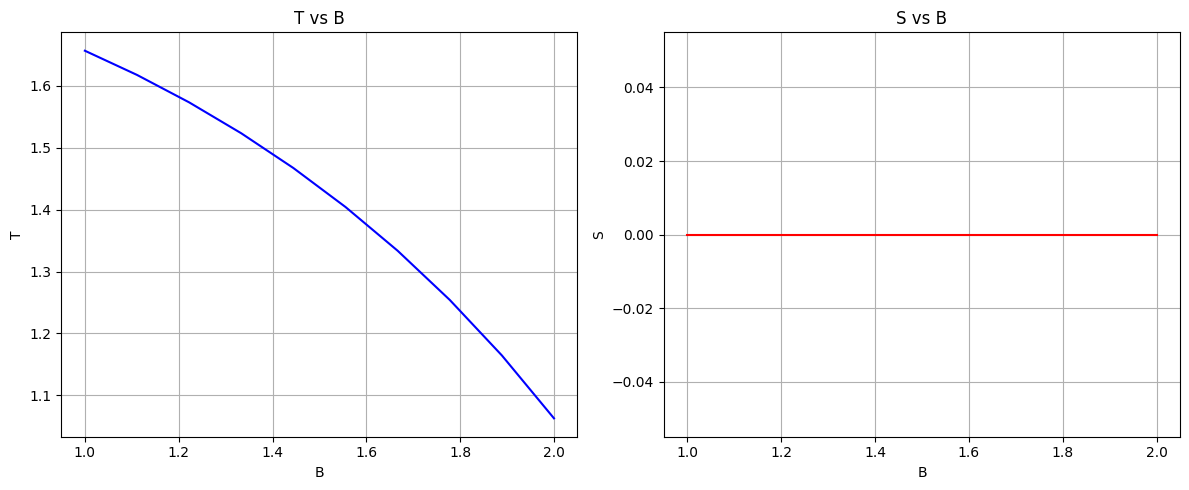

np.float64(1.0629366042142603)

In [169]:
J = 0.7
hi = 2
hf = 1
T_guess = 1
ENTROPY = 0.5
INTERVAL = 10
initialOrFinal = 0 # [0] para o primeiro item da lista OU [-1] para o último item da lista
calc_BTandBS(J, hi, hf, T_guess, ENTROPY, INTERVAL, initialOrFinal)

In [47]:
def plot_BTeBS(B_values, T_values, S_values):
    #Plotando os gráficos
    plt.figure(figsize=(12, 5))

    # Gráfico B vs T
    plt.subplot(1, 2, 1)
    plt.plot(B_values, T_values, 'b-')
    plt.xlabel('B')
    plt.ylabel('T')
    plt.title('T vs B')
    plt.grid(True)

    # Gráfico B vs S
    plt.subplot(1, 2, 2)
    plt.plot(B_values, S_values, 'r-')
    plt.xlabel('B')
    plt.ylabel('S')
    plt.title('S vs B')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Energia Interna:

In [106]:
def internal_Energy(J, h, temperature):
    Z = (
            (
                1
            )
                +
            (
                np.exp((8 * J) / (temperature))
            )            
                +            
            (
                2 * 
                np.cosh((2 * h) / (temperature))
            )
    )
    
    numerador = (
                    np.exp(
                        (8*J)/temperature
                    )        
                    +
                    (
                        (4*h)*np.sinh(
                            (2*h/temperature)
                        )
                    )
    
    )
    
    U = (((-1)*numerador)/Z)
    
    return U

Temperatura no processo adiabático:

In [155]:
def adiabatic_Temperature(temperature, magnetic_field):
    BOLTZMANN = 1
    
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}]")
    Z = (                                                          
        1 + 
        np.exp(8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING / (BOLTZMANN * temperature)) + 
        (
            2 * 
            np.cosh(2 * magnetic_field / (BOLTZMANN * temperature))
        )
    )
    term1 = (ENTROPY * (-1)) + (BOLTZMANN * np.log(Z))
    numerator = (                
            (
                8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING * 
                np.exp(8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING / (BOLTZMANN * temperature))
            ) + 
            (
                4 * magnetic_field * 
                np.sinh(2 * magnetic_field / (BOLTZMANN * temperature))
            )
        )
    
    
    denominator = temperature * Z
    term2 =  numerator / denominator
    calculated_temperature = term1 - term2
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}] result[{calculated_temperature}]")
    return calculated_temperature

Campo magnético:

In [156]:
def final_Temperature(INTERVAL, MAGNETIC_FIELD_INITIAL, MAGNETIC_FIELD_FINAL, temperature_guess, lastOrFirst):
    
    #definindo os intervalos de h
    magnetic_fields = np.linspace(MAGNETIC_FIELD_INITIAL, MAGNETIC_FIELD_FINAL, INTERVAL)
    #definindo temperatures como uma lista de valores, para os diferentes valores de campos magnético
    temperatures = []



    for magnetic_field in magnetic_fields:
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
        try:
            calculated_temperature = fsolve(lambda temperature: adiabatic_Temperature(temperature, magnetic_field), temperature_guess)
            if (log_detailed_calculation(magnetic_field)):
                print(f"Final Result={calculated_temperature}")
            
            #Update temperature guess with the result of previuos systems
            temperature_guess = calculated_temperature[0]
            
            #Append the system result to the list of temperatures to be plotted
            temperatures.append(calculated_temperature[0])  # Adiciona o valor encontrado para T
        except RuntimeWarning:
            temperatures.append(np.nan)  # Se houver erro, adiciona NaN para evitar falha
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
    print(f"Temperatura final:{temperatures[lastOrFirst]}")
    
    
    return temperatures[lastOrFirst] 


O calor e o trabalho vai ser calculado através da variação da energia interna em cada processo, i.e., $W= \Delta U$ ou $\Delta Q = U$ em cada um dos processo. De forma mais clara:

 - $W_{out} = U_{B} - U_{A}$  ||
  $(T_c, \lambda_i) \rightarrow (T_{c}^*, \lambda_f)$;

 - $Q_{h} = U_{C} - U_{B}$    ||
  $(T_{c}^*, \lambda_f) \rightarrow (T_h, \lambda_f)$;

 - $W_{in} = U_{D} - U_{C}$   ||
  $(T_h, \lambda_f) \rightarrow (T_{c}^*, \lambda_i)$;

 - $Q_{c} = U_{D} - U_{A}$    ||
  $(T_{c}^*, \lambda_i) \rightarrow (T_c, \lambda_i)$.  


NOTA: As temperaturas $T_c^*$ e $T_h^*$ são as temperaturas obtidas através da solução da equação $f(J,h,T,S) = 0$, para $S$ constante. A priori, $T_c$ e $T_h$ são fixas, pois são macroscópicas. 

$W_{out}:$

In [89]:
def out_Work(J,hi,hf,Tc, Th, INTERVAL, temperature_guess, lastOrFirst):
    
    
    
    Ua = internal_Energy(J, hi, Tc)
    
    add_Th = final_Temperature(INTERVAL, hi, hf, temperature_guess, lastOrFirst)
    Ub = internal_Energy(J, hf, add_Th)
    
    work_out = Ub - Ua
    
    return work_out

$W_{in}:$

In [74]:
def in_Work(J, hi, hf, Tc, Th, INTERVAL, temperature_guess, lastOrFirst):
    
    
    add_Tc = final_Temperature(INTERVAL, hi, hf, temperature_guess, lastOrFirst)    
    Ud = internal_Energy(J, hi, add_Tc)
    
    Uc = internal_Energy(J, hf, Th)
    work_in = Ud - Uc
    
    return work_in

$Q_h:$

In [75]:
def hot_Q(J, hi, hf, Tc, Th, INTERVAL, temperature_guess, lastOrFirst):
    
    Uc = internal_Energy(J, hf, Th)
    
    
    add_Tc = final_Temperature(INTERVAL, hi, hf, temperature_guess, lastOrFirst)
    Ub = internal_Energy(J, hf, add_Tc)    
    
    Q_hot = Uc - Ub
    
    return Q_hot

$Q_c:$

In [91]:
def cold_Q(J, hi, hf, Tc, Th, INTERVAL, temperatures_guess, lastOrFirst):
    
    
    Ua = internal_Energy(J, hi, Tc)
    
    add_Th = final_Temperature(INTERVAL, hi, hf, temperature_guess, lastOrFirst)    
    Ud = internal_Energy(J, hi, add_Th)
    
    Q_cold = Ud - Ua
    
    return Q_cold

In [118]:
J = 0.1
hi = 1
hf = 2
Tc = 1
Th = 5
temperature_guess_add_Tc = 1
temperature_guess_add_Th = 5
INTERVAL = 100
lastOrFirst_add_Tc = (1)
lastOrFirst_add_Th = -1


Win = in_Work(J, hi, hf, Tc, Th, INTERVAL, temperature_guess_add_Tc, lastOrFirst_add_Tc)
Wout = out_Work(J, hi, hf, Tc, Th, INTERVAL, temperature_guess_add_Tc, lastOrFirst_add_Tc)
Qhot = hot_Q(J, hi, hf, Tc, Th, INTERVAL, temperature_guess_add_Th, lastOrFirst_add_Th)

eta = (Wout - Win)/Qhot

print(eta, Win, Wout, Qhot)

Temperatura final:2.184414616758307
Temperatura final:2.184414616758307
Temperatura final:-3.6915938080415405
0.8211589993012589 0.528025223075469 -1.191499786963792 -2.094022000005407
